<a href="https://colab.research.google.com/github/sueta1995/CourseWork_TRPS/blob/machine_learning/classification/odonata_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization, Conv2D, Input
from keras.layers.pooling import MaxPool2D
from keras.optimizers import SGD, Adam

In [23]:
IMG_SIZE = 224
CHANNELS = 3
TRAIN_DIR = '/mnt/d/odonata_data_91/train_data'
VALID_DIR = '/mnt/d/odonata_data_91/valid_data'
EPOCHS = 40
BATCH_SIZE = 128

In [24]:
# Для google colab
# from google.colab import drive
# drive.mount('/content/drive')

# VALID_DIR = '/content/drive/MyDrive/odonata_data/valid_data'
# TRAIN_DIR = '/content/drive/MyDrive/odonata_data/train_data'

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.15,2.0],
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [26]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=32,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=32,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 39600 images belonging to 44 classes.
Found 4400 images belonging to 44 classes.


In [27]:
model = tf.keras.applications.resnet.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS),
    pooling=None,
    classes=44,
)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
history = model.fit(
    train_generator,
#     steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_generator,
#     validation_steps=valid_num // BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/40


2023-07-29 13:00:03.938449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-29 13:00:04.591618: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-29 13:00:04.591682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25430 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1238/1238 [==============================] - ETA: 0s - loss: 3.8037 - accuracy: 0.0431

2023-07-29 13:07:21.293423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-29 13:07:21.481048: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-29 13:07:21.481102: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25430 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1238/1238 [==============================] - 464s 373ms/step - loss: 3.8037 - accuracy: 0.0431 - val_loss: 4.6248 - val_accuracy: 0.0498
Epoch 2/40
1238/1238 [==============================] - 461s 373ms/step - loss: 3.6128 - accuracy: 0.0608 - val_loss: 3.6224 - val_accuracy: 0.0536
Epoch 3/40
1238/1238 [==============================] - 463s 374ms/step - loss: 3.4441 - accuracy: 0.0867 - val_loss: 3.2959 - val_accuracy: 0.1050
Epoch 4/40
1238/1238 [==============================] - 471s 380ms/step - loss: 3.2365 - accuracy: 0.1209 - val_loss: 3.2266 - val_accuracy: 0.1098
Epoch 5/40
1238/1238 [==============================] - 477s 385ms/step - loss: 2.9849 - accuracy: 0.1707 - val_loss: 3.3208 - val_accuracy: 0.1568
Epoch 6/40
1238/1238 [==============================] - 474s 383ms/step - loss: 2.7709 - accuracy: 0.2166 - val_loss: 2.6905 - val_accuracy: 0.2380
Epoch 7/40
1238/1238 [==============================] - 471s 380ms/step - loss: 2.5731 - accuracy: 0.2654 - val_loss: 2.561

In [16]:
model.save('/mnt/d/odonata_model_res.h5')

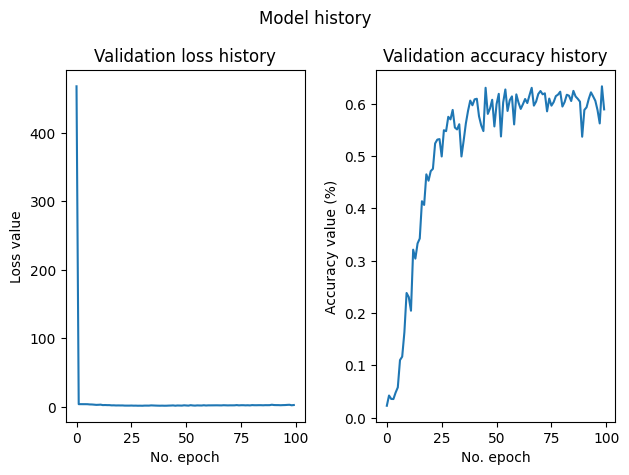

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot history: Loss
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Validation loss history')
axes[0].set_ylabel('Loss value')
axes[0].set_xlabel('No. epoch')

# Plot history: accuracy
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Validation accuracy history')
axes[1].set_ylabel('Accuracy value (%)')
axes[1].set_xlabel('No. epoch')

fig.suptitle('Model history')
plt.tight_layout()
fig.savefig('/mnt/d/history_model.png', bbox_inches='tight')

ValueError: Could not save to JPEG for display

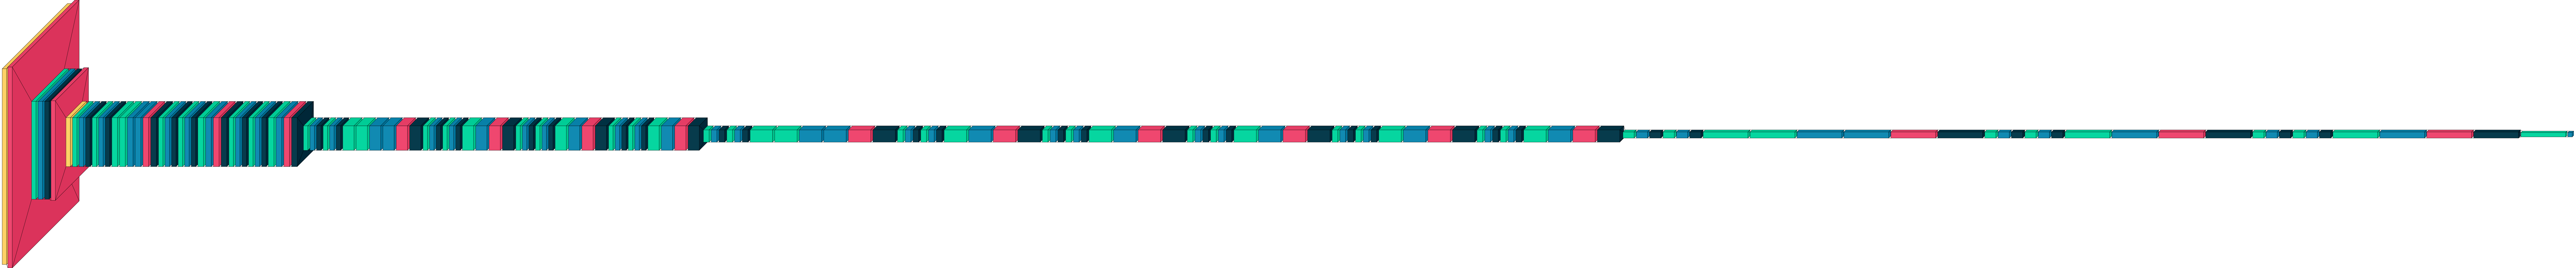

In [18]:
import visualkeras

visualkeras.layered_view(model, to_file='/mnt/d/visual_model_res.png')